# Health Recommender System for Cervical Cancer Prognosis in Women!
The goal of this note book is to replicate the research done by the paper with the same name 
Overall some notes in implemenatation:
- SMOTE has to be used to balance the training data set
- Used different machines learning models for this dataset
- Biopsy is used as the target class
- Use MOGA(Multi-Objective Genetic Algorithm to narrow down the feature sets --- Later) 

Cited paper:
Kuanr, Madhusree, et al. “Health Recommender System for Cervical Cancer Prognosis in Women.” 2021 6th International Conference on Inventive Computation Technologies (ICICT), Inventive Computation Technologies (ICICT), 2021 6th International Conference On, Jan. 2021, pp. 673–79. EBSCOhost, https://doi-org.ezproxy.mtsu.edu/10.1109/ICICT50816.2021.9358540.

In [1]:
from sklearn.datasets import load_digits
import numpy as np
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("./data/kag_risk_factors_cervical_cancer.csv")
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
target = 'Biopsy'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

Remove duplicates

In [6]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 835 non-null    int64 
 1   Number of sexual partners           835 non-null    object
 2   First sexual intercourse            835 non-null    object
 3   Num of pregnancies                  835 non-null    object
 4   Smokes                              835 non-null    object
 5   Smokes (years)                      835 non-null    object
 6   Smokes (packs/year)                 835 non-null    object
 7   Hormonal Contraceptives             835 non-null    object
 8   Hormonal Contraceptives (years)     835 non-null    object
 9   IUD                                 835 non-null    object
 10  IUD (years)                         835 non-null    object
 11  STDs                                835 non-null    object

# Preprocessing

Replace "?" with the median for all columns.

In [7]:
df = df.replace('?', np.nan)

print("Check all Nan counts")
df.isnull().sum()

Check all Nan counts


Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

In [8]:
df=df._convert(numeric=True)
df = df.fillna(df.median())

print("Check all Nan counts")
df.isnull().sum()

Check all Nan counts


Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           835 non-null    float64
 2   First sexual intercourse            835 non-null    float64
 3   Num of pregnancies                  835 non-null    float64
 4   Smokes                              835 non-null    float64
 5   Smokes (years)                      835 non-null    float64
 6   Smokes (packs/year)                 835 non-null    float64
 7   Hormonal Contraceptives             835 non-null    float64
 8   Hormonal Contraceptives (years)     835 non-null    float64
 9   IUD                                 835 non-null    float64
 10  IUD (years)                         835 non-null    float64
 11  STDs                                835 non-n

# Distribution of Classes

In [10]:
df[target].value_counts()

0    781
1     54
Name: Biopsy, dtype: int64

<AxesSubplot:>

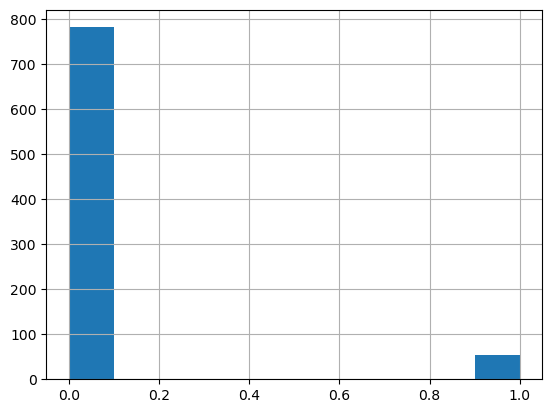

In [11]:
df[target].hist()

Correlation Matrix

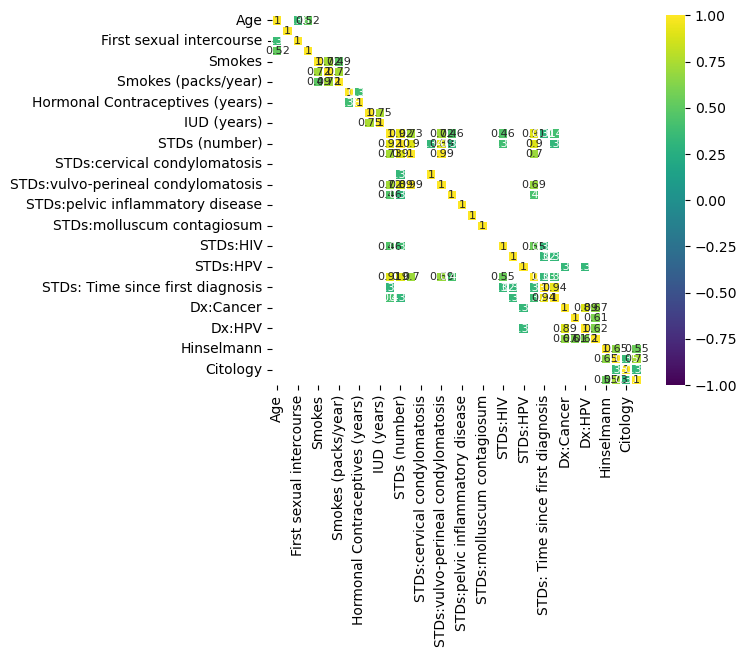

In [12]:
corr = df.corr() 
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);

In [13]:
X = df.drop(columns=target)
y = df[target]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify = y, shuffle=True)#stratify = y

In [16]:
y_test.value_counts()

0    258
1     18
Name: Biopsy, dtype: int64

# SMOTE

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
sm = SMOTE()

x_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [19]:
y_train_sm.value_counts()

0    523
1    523
Name: Biopsy, dtype: int64

# Normalization

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [21]:
TRAIN_WITH_SMOTE = True

displays features

In [22]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

Metrics for machine leraning models

In [23]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

def all_score(model,X_test,y_test):
  y_pred = model.predict(X_test)
  score_df = pd.DataFrame()
  data = {'Metrics': ['f1_macro', 'f1_micro', 'f1_weighted', 'recall_macro','accuracy','precision_macro', 'recall_micro','precision_micro'],
          'Score': [f1_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='micro'),
                    f1_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred,average='macro'),
                    accuracy_score(y_test, y_pred), precision_score(y_test, y_pred,average='macro'),
                    recall_score(y_test, y_pred,average='macro'),precision_score(y_test, y_pred,average='macro')]} 
 
  df = pd.DataFrame(data)
  return df

In [24]:
import scikitplot as skplt

# CatBoost
A really specific Gradient Boosting algorithm that can be used on decision tree
!pip install catboost

In [25]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [26]:
from catboost import CatBoostClassifier
from catboost import Pool

def fit_model(train_pool, validation_pool, **kwargs):
    model = CatBoostClassifier(
        iterations=1000,
        use_best_model= True,
        #task_type='GPU'
    )

    return model.fit(
        train_pool,
        eval_set=validation_pool,
        verbose=100,
    )

In [27]:
if TRAIN_WITH_SMOTE:
  train_pool = Pool(x_train_sm, y_train_sm)
else:
  train_pool = Pool(X_train, y_train)

validation_pool = Pool(
    X_test, y_test
)

print('Train dataset shape: {}\n'.format(train_pool.shape))

model = fit_model(train_pool, validation_pool)

Train dataset shape: (1046, 35)

Learning rate set to 0.032043
0:	learn: 0.6425016	test: 0.6440958	best: 0.6440958 (0)	total: 149ms	remaining: 2m 29s
100:	learn: 0.0758782	test: 0.1924505	best: 0.1924505 (100)	total: 282ms	remaining: 2.51s
200:	learn: 0.0399702	test: 0.1884210	best: 0.1873836 (185)	total: 417ms	remaining: 1.66s
300:	learn: 0.0265027	test: 0.1908006	best: 0.1873836 (185)	total: 546ms	remaining: 1.27s
400:	learn: 0.0181512	test: 0.1962931	best: 0.1873836 (185)	total: 684ms	remaining: 1.02s
500:	learn: 0.0129344	test: 0.2042757	best: 0.1873836 (185)	total: 823ms	remaining: 820ms
600:	learn: 0.0104475	test: 0.2085973	best: 0.1873836 (185)	total: 956ms	remaining: 635ms
700:	learn: 0.0086532	test: 0.2119664	best: 0.1873836 (185)	total: 1.09s	remaining: 464ms
800:	learn: 0.0075701	test: 0.2157382	best: 0.1873836 (185)	total: 1.21s	remaining: 301ms
900:	learn: 0.0067120	test: 0.2188520	best: 0.1873836 (185)	total: 1.34s	remaining: 147ms
999:	learn: 0.0061108	test: 0.2212267	be

In [28]:
model.score(X_test,y_test)

0.9492753623188406

In [29]:
df_score = all_score(model,X_test,y_test)
df_score

,Metrics,Score
0,f1_macro,0.827130
1,f1_micro,0.949275
2,f1_weighted,0.953487
3,recall_macro,0.895349
4,accuracy,0.949275
5,precision_macro,0.782462
6,recall_micro,0.895349
7,precision_micro,0.782462


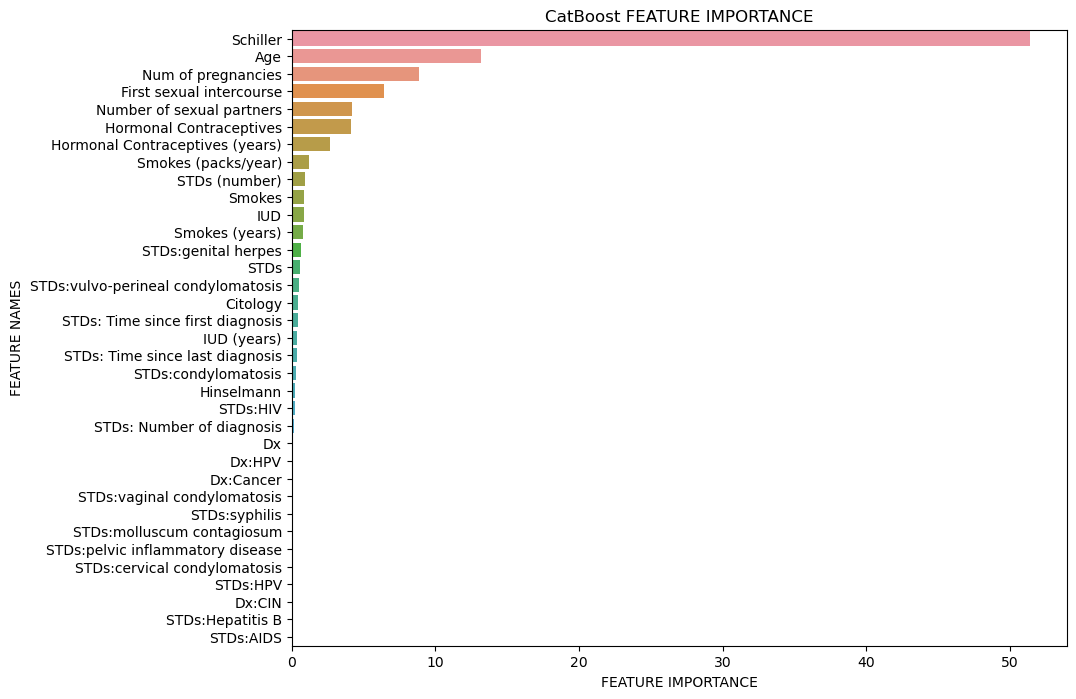

In [30]:
plot_feature_importance(model.get_feature_importance(),X_train.columns,'CatBoost')

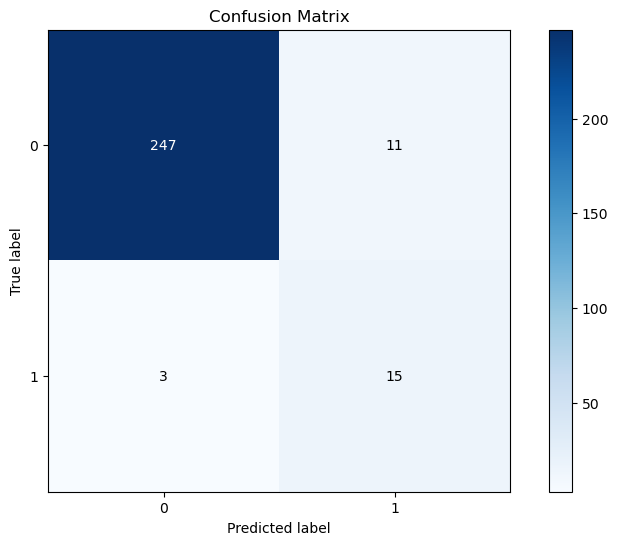

In [31]:
y_pred = model.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, figsize=(10,6))
plt.show()